<h3>Ideal Location for a Coffee Shop in Miami</h3>

Import the required libraries for the project

In [1]:
import numpy as np
import pandas as pd

#Handle json files
import json

#Convert an address into latitude and longtitude values
from geopy.geocoders import Nominatim

#get requests from webpage and parse through it and use pandas it to transform HTML into dataframe
import requests
from pandas.io.json import json_normalize

#Matplotlib and additional plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#Library for K Means Clustering of Neighborhoods in Miami
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import folium

print('Libraries successfully imported.')

Libraries successfully imported.


Scrape neighborhoods in Miami data

In [2]:
#Initial dataframe
mia_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_communities_in_Miami-Dade_County,_Florida')

mia_df = pd.DataFrame(mia_df[0])
mia_df.head()

,0,1,2,3,4
0,#,Incorporated Community,Designation,Date incorporated,2010 Population
1,2,Aventura,City,"November 7, 1995",35762
2,7,Bal Harbour,Village,"June 16, 1947",2513
3,8,Bay Harbor Islands,Town,April 1947,5628
4,11,Biscayne Park,Village,1933,3055


<h3>Need to change the format of the dataframe</h3>

In [3]:
#Make the correct headers for the data
mia_df = mia_df.rename(columns = mia_df.iloc[0])

#Now drop first row that is now our headers
mia_df = mia_df.drop(mia_df.index[0])

del mia_df['#']
del mia_df['Designation']
del mia_df['Date incorporated']

mia_df

,Incorporated Community,2010 Population
1,Aventura,35762
2,Bal Harbour,2513
3,Bay Harbor Islands,5628
4,Biscayne Park,3055
5,Coral Gables,46780
6,Cutler Bay,40286
7,Doral,45704
8,El Portal,2325
9,Florida City,11245
10,Golden Beach,919


<h3>The following is a histogram based on population of the communities
which could be important to stakeholders once we find results later</h3>

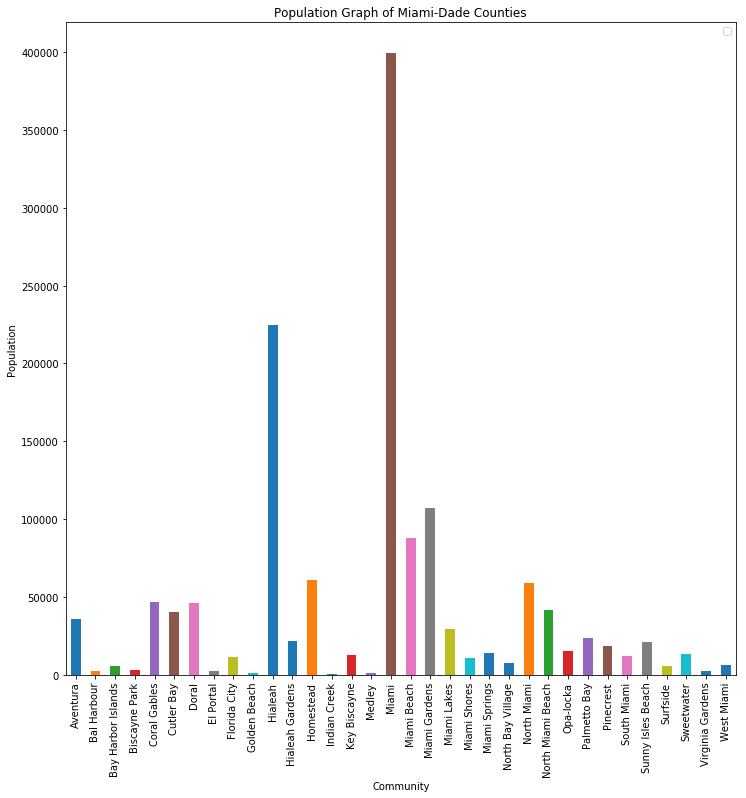

In [4]:
#Need to make population numbers a float from string
mia_df['2010 Population'] = mia_df['2010 Population'].astype(float)

pop_plot = mia_df.plot.bar(x = 'Incorporated Community', y = '2010 Population', figsize = (12,12))

pop_plot.set_title('Population Graph of Miami-Dade Counties')
pop_plot.set_xlabel('Community')
pop_plot.set_ylabel('Population')
pop_plot.legend('')

fig = pop_plot.get_figure()
fig.savefig('Population_Graph_Miami_Dade.jpg', bbox_inches = 'tight')

<h3>The following are my Foursquare credentials</h3>

In [5]:
CLIENT_ID = 'DIWGAQS4XLGDG4XHINZNE3TKMODECIVPU4IAVU55G5ZZRXYG' # your Foursquare ID
CLIENT_SECRET = '1XTKIL2W15SPNIIPW2SBK2KJB4QGYSGVTFTYJSNN0GFLZKJH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

<h3>Before dealing with Foursquare, I need Latitude and Longitude for all the communities using the geopy library</h3>

In [6]:
#List of all the neighborhoods in Miami Dade County
addresses = ['Aventura, Florida', 'Bal Harbour, Florida', 'Bay Harbor Islands, Florida', 'Biscayne Park, Florida', 'Coral Gables, Florida',
            'Cutler Bay, Florida', 'Doral, Florida', 'El Portal, Florida', 'Florida City, Florida', 'Golden Beach, Florida', 'Hialeah, Florida',
            'Hialeah Gardens, Florida', 'Homestead, Florida', 'Indian Creek, Florida', 'Key Biscayne, Florida', 'Medley, Florida', 'Miami, Florida',
            'Miami Beach, Florida', 'Miami Gardens, Florida', 'Miami Lakes, Florida', 'Miami Shores, Florida', 'Miami Springs, Florida', 'North Bay Village, Florida',
            'North Miami, Florida', 'North Miami Beach, Florida', 'Opa-locka, Florida', 'Palmetto Bay, Florida', 'Pinecrest, Florida',
            'South Miami, Florida', 'Sunny Isles Beach, Florida', 'Surfside, Florida', 'Sweetwater, Florida', 'Virginia Gardens, Florida', 'West Miami, Florida']

#Blank lists to store lat and lon for each address
lat_table = []
lon_table = []

for address in addresses:
    
    geolocator = Nominatim(user_agent = 'to_explorer')
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinates of {} are {}, {}.'.format(address, latitude, longitude))
    
    lat_table.append(latitude)
    lon_table.append(longitude)

The geograpical coordinates of Aventura, Florida are 25.9653698, -80.1428234.
The geograpical coordinates of Bal Harbour, Florida are 25.8880108, -80.123827.
The geograpical coordinates of Bay Harbor Islands, Florida are 25.8875948, -80.1311564.
The geograpical coordinates of Biscayne Park, Florida are 25.8825951, -80.1806025.
The geograpical coordinates of Coral Gables, Florida are 25.6905515, -80.235008979837.
The geograpical coordinates of Cutler Bay, Florida are 25.575865, -80.3413722771916.
The geograpical coordinates of Doral, Florida are 25.8184725, -80.3539679130979.
The geograpical coordinates of El Portal, Florida are 25.8553739, -80.193103.
The geograpical coordinates of Florida City, Florida are 25.4480101, -80.479102.
The geograpical coordinates of Golden Beach, Florida are 25.9650919, -80.1222671.
The geograpical coordinates of Hialeah, Florida are 25.8575963, -80.2781057.
The geograpical coordinates of Hialeah Gardens, Florida are 25.8906709, -80.3641742881597.
The geogr

Confirm Latitude and Longitude lists are complete

In [7]:
#Coral Gables coordinates are incorrect in the geopy library replace those
#These are from the site https://www.latlong.net

lat_table[4] = 25.721491
lon_table[4] = -80.268387

print(lat_table, lon_table)

[25.9653698, 25.8880108, 25.8875948, 25.8825951, 25.721491, 25.575865, 25.8184725, 25.8553739, 25.4480101, 25.9650919, 25.8575963, 25.8906709, 25.4718946, 27.2780437, 25.6968351, 25.8406526, 25.7742658, 25.7929198, 25.94207545, 25.91162125, 25.8631515, 25.82184795, 25.8462075, 25.90560775, 25.9331488, 25.89673385, 25.622042, 25.6670476, 25.7078467, 25.939003, 25.8784285, 25.7683867, 25.8103758, 25.7634331] [-80.1428234, -80.123827, -80.1311564, -80.1806025, -80.268387, -80.3413722771916, -80.3539679130979, -80.193103, -80.479102, -80.1222671, -80.2781057, -80.3641742881597, -80.4759905, -82.3080581, -80.1635261, -80.3264404, -80.1936589, -80.1353006, -80.2397528099553, -80.3212747999664, -80.1928253, -80.2927081391561, -80.1539351, -80.1750695501309, -80.1625463, -80.2594964085029, -80.3209961355353, -80.3081074, -80.2956356768285, -80.1255338721964, -80.1256007, -80.3650831905196, -80.3022732, -80.2961621]


<h3>Now append the lat and lon to our existing Miami Dade dataframe</h3>

In [8]:
#Place the aforementioned lists into a dictionary for use in the dataframe
d = {'Incorporated Community' : mia_df['Incorporated Community'] ,'Latitude' : lat_table, 'Longitude' : lon_table}

latlon_df = pd.DataFrame(d)

latlon_df.head()

,Incorporated Community,Latitude,Longitude
1,Aventura,25.965370,-80.142823
2,Bal Harbour,25.888011,-80.123827
3,Bay Harbor Islands,25.887595,-80.131156
4,Biscayne Park,25.882595,-80.180603
5,Coral Gables,25.721491,-80.268387


Merge with Miami dataframe

In [9]:
mia_latlon_df = pd.merge(mia_df, latlon_df, on = 'Incorporated Community', how = 'inner')

mia_latlon_df

,Incorporated Community,2010 Population,Latitude,Longitude
0,Aventura,35762.0,25.965370,-80.142823
1,Bal Harbour,2513.0,25.888011,-80.123827
2,Bay Harbor Islands,5628.0,25.887595,-80.131156
3,Biscayne Park,3055.0,25.882595,-80.180603
4,Coral Gables,46780.0,25.721491,-80.268387
5,Cutler Bay,40286.0,25.575865,-80.341372
6,Doral,45704.0,25.818472,-80.353968
7,El Portal,2325.0,25.855374,-80.193103
8,Florida City,11245.0,25.448010,-80.479102
9,Golden Beach,919.0,25.965092,-80.122267


<h3>Sweet. All latitude, longitude are with their respective locations. Let's make a map to orient ourselves with these locations</h3>

In [10]:
# create map of Miami using latitude and longitude values 
map_Miami = folium.Map(location=[lat_table[16], lon_table[16]], zoom_start=10)

# add markers to map
for lat, lon, neighborhood in zip(mia_latlon_df['Latitude'], mia_latlon_df['Longitude'], mia_latlon_df['Incorporated Community']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Miami)  
    
map_Miami

<h3>Now need to call Foursquare API in order to get the top venues in each location</h3>

In [11]:
def get_venues(neighborhood_name, latitudes, longitudes, radius = 1000, limit = 100):
    venues_ = []
    
    for name, lat, lng in zip(neighborhood_name, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
        
        #Get venues
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        #venue_results = results.json()
        
        venues_.append([(name, lat, lng,
                      v['venue']['name'],
                      v['venue']['location']['lat'],
                      v['venue']['location']['lng'],
                      v['venue']['categories'][0]['name']) 
                      for v in venue_results])
        
        #Combine them into a dataframe with Miami-Dade data
        venue_mia_df = pd.DataFrame([item for venue in venues_ for item in venue])
        venue_mia_df.columns = ['Community', 'Community Latitude', 'Community Longitude',
                                'Venue Name', 'Venue Latitude', 'Venue Longitude',
                               'Venue Category']
        
    return(venue_mia_df)
    

In [12]:
get_nearby_venues = get_venues(neighborhood_name = mia_latlon_df['Incorporated Community'],
          latitudes = mia_latlon_df['Latitude'],
          longitudes = mia_latlon_df['Longitude'])

Aventura
Bal Harbour
Bay Harbor Islands
Biscayne Park
Coral Gables
Cutler Bay
Doral
El Portal
Florida City
Golden Beach
Hialeah
Hialeah Gardens
Homestead
Indian Creek
Key Biscayne
Medley
Miami
Miami Beach
Miami Gardens
Miami Lakes
Miami Shores
Miami Springs
North Bay Village
North Miami
North Miami Beach
Opa-locka
Palmetto Bay
Pinecrest
South Miami
Sunny Isles Beach
Surfside
Sweetwater
Virginia Gardens
West Miami


In [13]:
print(get_nearby_venues.shape)
get_nearby_venues

(1378, 7)


,Community,Community Latitude,Community Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Aventura,25.965370,-80.142823,Power Smoothie,25.964466,-80.143703,Restaurant
1,Aventura,25.965370,-80.142823,Sicilian Oven,25.964936,-80.143824,Italian Restaurant
2,Aventura,25.965370,-80.142823,Barrio Latino,25.965131,-80.144348,Latin American Restaurant
3,Aventura,25.965370,-80.142823,Asaka Japanese Restaurant,25.964230,-80.143092,Japanese Restaurant
4,Aventura,25.965370,-80.142823,Juice & Java,25.964387,-80.144542,Juice Bar
5,Aventura,25.965370,-80.142823,AC Hotel by Marriott Miami Aventura,25.967868,-80.142251,Hotel
6,Aventura,25.965370,-80.142823,La Boulangerie BOUL'MICH,25.964807,-80.144055,French Restaurant
7,Aventura,25.965370,-80.142823,Michaels,25.966405,-80.144246,Arts & Crafts Store
8,Aventura,25.965370,-80.142823,Nordstrom Rack,25.967202,-80.144570,Discount Store
9,Aventura,25.965370,-80.142823,Marshalls,25.965415,-80.144342,Department Store


<h3>Build a frequency table in order to see the frequency of coffee shops in each area, we need to start by turning categorical variable into binary vectors i.e. One-hot encoding</h3>

In [14]:
nearby_venue_count = get_nearby_venues.groupby('Community').count().reset_index()
nearby_venue_count

,Community,Community Latitude,Community Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Aventura,100,100,100,100,100,100
1,Bal Harbour,69,69,69,69,69,69
2,Bay Harbor Islands,66,66,66,66,66,66
3,Biscayne Park,22,22,22,22,22,22
4,Coral Gables,35,35,35,35,35,35
5,Cutler Bay,28,28,28,28,28,28
6,Doral,50,50,50,50,50,50
7,El Portal,44,44,44,44,44,44
8,Florida City,58,58,58,58,58,58
9,Golden Beach,22,22,22,22,22,22


In [15]:
#Drop Communities that have less than 20 venues returned
nearby_venue_count.rename(columns = {'Venue Name': 'Venue_Name'}, inplace = True)
nearby_venue_count = nearby_venue_count[nearby_venue_count.Venue_Name > 20]
nearby_venue_count

,Community,Community Latitude,Community Longitude,Venue_Name,Venue Latitude,Venue Longitude,Venue Category
0,Aventura,100,100,100,100,100,100
1,Bal Harbour,69,69,69,69,69,69
2,Bay Harbor Islands,66,66,66,66,66,66
3,Biscayne Park,22,22,22,22,22,22
4,Coral Gables,35,35,35,35,35,35
5,Cutler Bay,28,28,28,28,28,28
6,Doral,50,50,50,50,50,50
7,El Portal,44,44,44,44,44,44
8,Florida City,58,58,58,58,58,58
9,Golden Beach,22,22,22,22,22,22


<h3>Plot the amount of venues in each of these communities</h3>

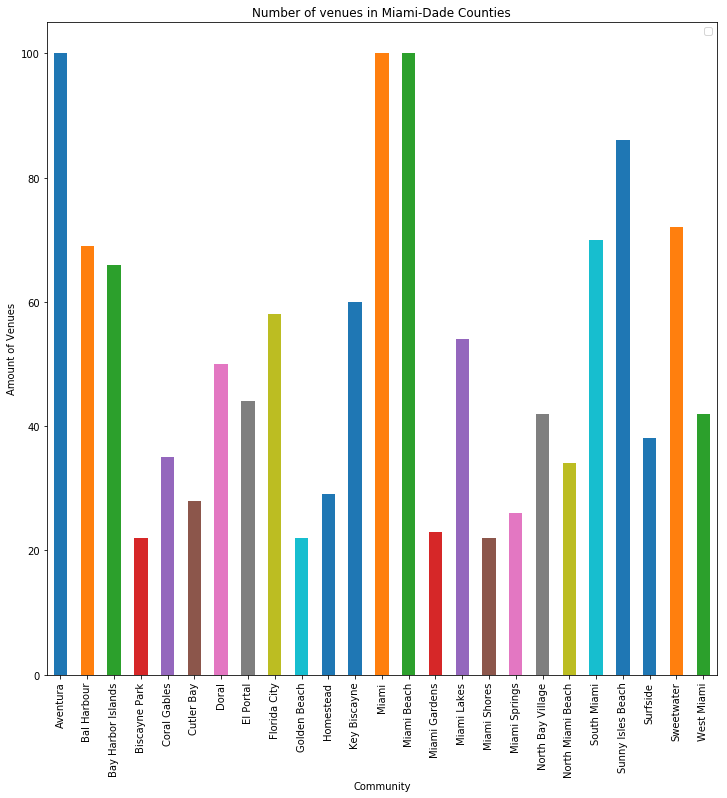

In [16]:

venue_num_plot = nearby_venue_count.plot.bar(x = 'Community', y = 'Venue_Name', figsize = (12,12))

venue_num_plot.set_title('Number of venues in Miami-Dade Counties')
venue_num_plot.set_xlabel('Community')
venue_num_plot.set_ylabel('Amount of Venues')
venue_num_plot.legend('')

fig = venue_num_plot.get_figure()
fig.savefig('Venue_Graph_Miami_Dade.jpg', bbox_inches = 'tight')

In [17]:
#One hot encoding
mia_onehot = pd.get_dummies(get_nearby_venues[['Venue Category']], prefix = '', prefix_sep = '')

#Add community
mia_onehot['Community'] = get_nearby_venues['Community']

#move Coommunity to first column
fix_columns = [mia_onehot.columns[-1]] + list(mia_onehot.columns[:-1])
mia_onehot = mia_onehot[fix_columns]


In [18]:
mia_grouped = mia_onehot.groupby(['Community']).mean().reset_index()
drop_lst = ['Biscayne Park', 'Golden Beach', 'Hialeah', 'Hialeah Gardens',
                 'Indian Creek', 'Medley', 'North Miami', 'Opa-locka', 'Palmetto Bay',
                 'Pinecrest', 'Virginia Gardens']

for address in drop_lst:
    
    mia_grouped = mia_grouped[mia_grouped.Community != address]


mia_grouped


,Community,ATM,Accessories Store,Acupuncturist,Airport,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,Aventura,0.0,0.020000,0.000000,0.0,0.030000,0.0,0.000000,0.000000,0.010000,...,0.000000,0.00,0.000000,0.010000,0.0,0.000000,0.01,0.00000,0.000000,0.010000
1,Bal Harbour,0.0,0.000000,0.000000,0.0,0.014493,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.014493,0.00,0.00000,0.000000,0.028986
2,Bay Harbor Islands,0.0,0.000000,0.000000,0.0,0.015152,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.015152,0.00,0.00000,0.000000,0.030303
4,Coral Gables,0.0,0.000000,0.028571,0.0,0.000000,0.0,0.000000,0.000000,0.028571,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.00000,0.000000,0.000000
5,Cutler Bay,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.00000,0.035714,0.000000
6,Doral,0.0,0.000000,0.000000,0.0,0.020000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.00000,0.000000,0.000000
7,El Portal,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.022727,0.00,0.022727,0.000000,0.0,0.000000,0.00,0.00000,0.000000,0.000000
8,Florida City,0.0,0.051724,0.000000,0.0,0.051724,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.017241,0.0,0.000000,0.00,0.00000,0.000000,0.017241
12,Homestead,0.0,0.000000,0.000000,0.0,0.103448,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.00000,0.000000,0.000000
14,Key Biscayne,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.016667,0.050000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.00000,0.000000,0.000000


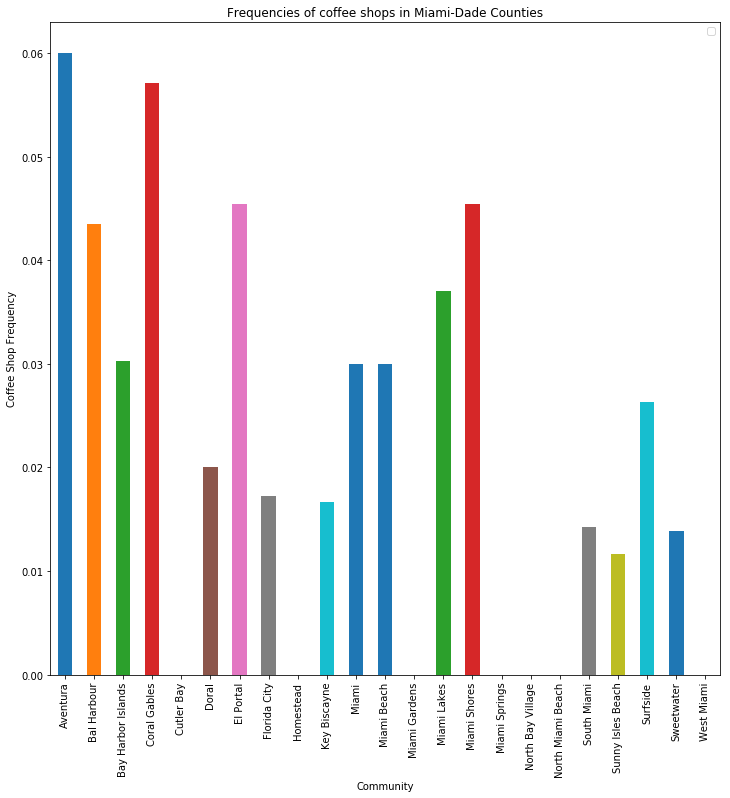

In [19]:
coffee_plot = mia_grouped.plot.bar(x = 'Community', y = 'Coffee Shop', figsize = (12,12))

coffee_plot.set_title('Frequencies of coffee shops in Miami-Dade Counties')
coffee_plot.set_xlabel('Community')
coffee_plot.set_ylabel('Coffee Shop Frequency')
coffee_plot.legend('')

fig = coffee_plot.get_figure()
fig.savefig('Coffee_Shop_frequency_Graph_Miami_Dade.jpg', bbox_inches = 'tight')

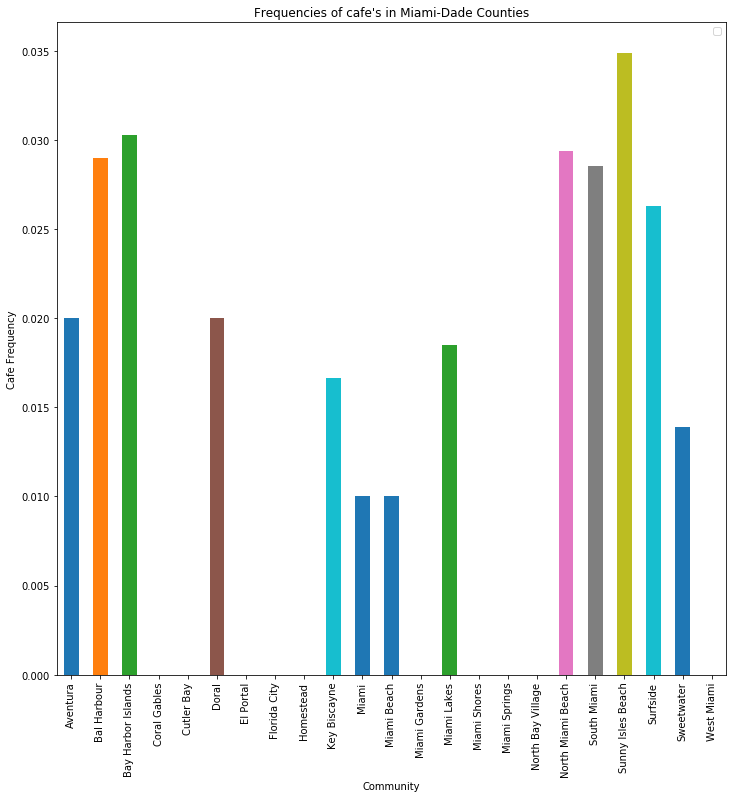

In [20]:
cafe_plot = mia_grouped.plot.bar(x = 'Community', y = 'Café', figsize = (12,12))

cafe_plot.set_title("Frequencies of cafe's in Miami-Dade Counties")
cafe_plot.set_xlabel('Community')
cafe_plot.set_ylabel('Cafe Frequency')
cafe_plot.legend('')

fig = cafe_plot.get_figure()
fig.savefig('Cafe_Shop_frequency_Graph_Miami_Dade.jpg', bbox_inches = 'tight')

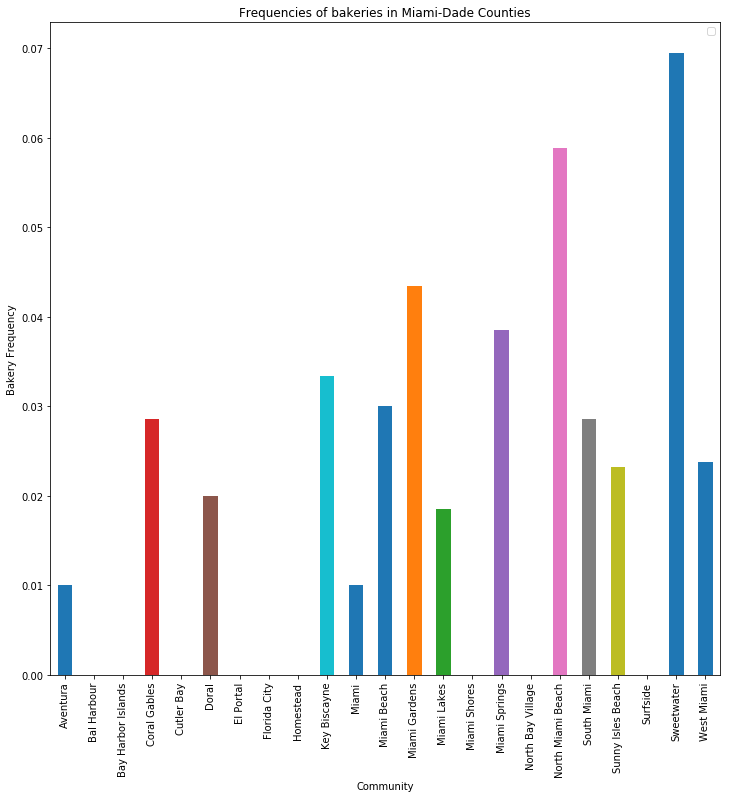

In [21]:
bake_plot = mia_grouped.plot.bar(x = 'Community', y = 'Bakery', figsize = (12,12))

bake_plot.set_title("Frequencies of bakeries in Miami-Dade Counties")
bake_plot.set_xlabel('Community')
bake_plot.set_ylabel('Bakery Frequency')
bake_plot.legend('')

fig = bake_plot.get_figure()
fig.savefig('Bakery_frequency_Graph_Miami_Dade.jpg', bbox_inches = 'tight')

<h3>Should be able to make the frequency table for the top 5 venue frequencies of each community</h3>

In [22]:
#Frequency table

top_venues = 5

for n_hood in mia_grouped['Community']:
    print('-------' + n_hood + '-------')
    temp_df = mia_grouped[mia_grouped['Community'] == n_hood].T.reset_index()
    temp_df.columns = ['Venue', 'freq']
    temp_df = temp_df.iloc[1:]
    
    #Make frequency column a float and then round to 2 decimals
    temp_df['freq'] = temp_df['freq'].astype(float)
    temp_df = temp_df.round({'freq': 2})
    
    print(temp_df.sort_values('freq', ascending= False).reset_index(drop=True).head(top_venues))
    print('\n')
    

-------Aventura-------
              Venue  freq
0    Clothing Store  0.12
1       Coffee Shop  0.06
2    Cosmetics Shop  0.05
3  Department Store  0.04
4     Grocery Store  0.04


-------Bal Harbour-------
                Venue  freq
0               Hotel  0.07
1               Beach  0.07
2            Boutique  0.04
3  Italian Restaurant  0.04
4         Coffee Shop  0.04


-------Bay Harbor Islands-------
                Venue  freq
0               Hotel  0.06
1            Boutique  0.05
2  Italian Restaurant  0.05
3       Women's Store  0.03
4                Park  0.03


-------Coral Gables-------
                Venue  freq
0   Convenience Store  0.09
1            Pharmacy  0.06
2         Coffee Shop  0.06
3    Sushi Restaurant  0.06
4  Mexican Restaurant  0.06


-------Cutler Bay-------
                  Venue  freq
0        Baseball Field  0.07
1  Fast Food Restaurant  0.07
2              Pharmacy  0.07
3     Convenience Store  0.04
4  Gym / Fitness Center  0.04


-------Doral----

<h3> Now we need to cluster the neighborhoods baseed on most common venues so we can get a more generalized area for operation of 
    Crackin' Coffee</h3>

In [23]:
def most_common_venue(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sort = row_categories.sort_values(ascending=False)
    
    return row_categories_sort.index.values[0:top_venues]

In [24]:
top_venues = 10

position_id = ['st', 'nd', 'rd']

#Columns according to number of top venues
column = ['Community']
for ind in np.arange(top_venues):
    try:
        column.append('{}{} Most Common Venue'.format(ind + 1, position_id[ind]))
    except:
        column.append('{} Most common Venue'.format(ind + 1))
        
#New DataFrame
community_venues_sort = pd.DataFrame(columns = column)
community_venues_sort['Community'] = mia_grouped['Community']

for ind in np.arange(mia_grouped.shape[0]):
    community_venues_sort.iloc[ind, 1:] = most_common_venue(mia_grouped.iloc[ind, :], top_venues)
    
community_venues_sort

,Community,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4 Most common Venue,5 Most common Venue,6 Most common Venue,7 Most common Venue,8 Most common Venue,9 Most common Venue,10 Most common Venue
0,Aventura,Clothing Store,Coffee Shop,Cosmetics Shop,Juice Bar,Grocery Store,Department Store,Hotel,American Restaurant,Italian Restaurant,Jewelry Store
1,Bal Harbour,Beach,Hotel,Boutique,Italian Restaurant,Coffee Shop,Department Store,Shoe Store,Restaurant,Café,Pool
2,Bay Harbor Islands,Hotel,Boutique,Italian Restaurant,Deli / Bodega,Shoe Store,Restaurant,Café,Pool,Coffee Shop,Park
4,Coral Gables,Convenience Store,Pharmacy,Sporting Goods Shop,Coffee Shop,Mexican Restaurant,Sushi Restaurant,Motel,Bookstore,Fast Food Restaurant,Shipping Store
5,Cutler Bay,Pharmacy,Baseball Field,Fast Food Restaurant,Grocery Store,Liquor Store,Locksmith,Bar,Supplement Shop,Gas Station,Seafood Restaurant
6,Doral,Italian Restaurant,Fast Food Restaurant,Spa,Shipping Store,Smoothie Shop,Pizza Place,Shopping Mall,Japanese Restaurant,Sports Bar,Juice Bar
7,El Portal,Pizza Place,Coffee Shop,Bank,Pharmacy,Ice Cream Shop,Sandwich Place,Spa,Rental Car Location,Food Court,Department Store
8,Florida City,Hotel,Clothing Store,Shoe Store,Mexican Restaurant,Accessories Store,American Restaurant,Liquor Store,Hotel Pool,Women's Store,Sporting Goods Shop
12,Homestead,Mexican Restaurant,Pizza Place,American Restaurant,Grocery Store,Thai Restaurant,Motel,Fast Food Restaurant,Fried Chicken Joint,Big Box Store,Sandwich Place
14,Key Biscayne,Beach,Restaurant,Argentinian Restaurant,Italian Restaurant,Pizza Place,Sandwich Place,Peruvian Restaurant,Bakery,Mexican Restaurant,Gift Shop


<h3> This should be enough to do the K-means clustering to construct the clustering map</h3>

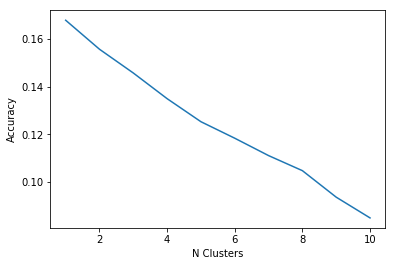

In [68]:
#Set number of clusters
k_clust = [1,2,3,4,5,6,7,8,9,10]

mia_group_clusters = mia_grouped.drop('Community', 1)

scores = []
for n in k_clust:

    kmeans = KMeans(n_clusters = n, random_state=0).fit(mia_group_clusters)
    scores.append(sum(np.min(cdist(mia_group_clusters, kmeans.cluster_centers_, 'euclidean'), axis=1)) / mia_group_clusters.shape[0])

plt.plot(k_clust, scores)
plt.xlabel('N Clusters')
plt.ylabel('Accuracy')

plt.savefig('k_means_plot', bbox_inches = 'tight')

plt.show()

<h3> Elbow method above tells us to use 5 clusters for this data

In [26]:
k_clusters = 5

kmeans = KMeans(n_clusters = k_clusters, random_state=0).fit(mia_group_clusters)

kmeans.labels_[0:10]

array([1, 0, 0, 2, 2, 2, 2, 1, 4, 0], dtype=int32)

In [27]:
#Add Labels
community_venues_sort.insert(0, 'Cluster Labels', kmeans.labels_)

mia_merged = mia_latlon_df

mia_merged.rename(columns = {'Incorporated Community' : 'Community'}, inplace = True)

drop_lst = ['Biscayne Park', 'Golden Beach', 'Hialeah', 'Hialeah Gardens',
                 'Indian Creek', 'Medley', 'North Miami', 'Opa-locka', 'Palmetto Bay',
                 'Pinecrest', 'Virginia Gardens']

for address in drop_lst:
    
    mia_merged = mia_merged[mia_merged.Community != address]




mia_merged = mia_merged.join(community_venues_sort.set_index('Community'), on = 'Community')

mia_merged

,Community,2010 Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4 Most common Venue,5 Most common Venue,6 Most common Venue,7 Most common Venue,8 Most common Venue,9 Most common Venue,10 Most common Venue
0,Aventura,35762.0,25.965370,-80.142823,1,Clothing Store,Coffee Shop,Cosmetics Shop,Juice Bar,Grocery Store,Department Store,Hotel,American Restaurant,Italian Restaurant,Jewelry Store
1,Bal Harbour,2513.0,25.888011,-80.123827,0,Beach,Hotel,Boutique,Italian Restaurant,Coffee Shop,Department Store,Shoe Store,Restaurant,Café,Pool
2,Bay Harbor Islands,5628.0,25.887595,-80.131156,0,Hotel,Boutique,Italian Restaurant,Deli / Bodega,Shoe Store,Restaurant,Café,Pool,Coffee Shop,Park
4,Coral Gables,46780.0,25.721491,-80.268387,2,Convenience Store,Pharmacy,Sporting Goods Shop,Coffee Shop,Mexican Restaurant,Sushi Restaurant,Motel,Bookstore,Fast Food Restaurant,Shipping Store
5,Cutler Bay,40286.0,25.575865,-80.341372,2,Pharmacy,Baseball Field,Fast Food Restaurant,Grocery Store,Liquor Store,Locksmith,Bar,Supplement Shop,Gas Station,Seafood Restaurant
6,Doral,45704.0,25.818472,-80.353968,2,Italian Restaurant,Fast Food Restaurant,Spa,Shipping Store,Smoothie Shop,Pizza Place,Shopping Mall,Japanese Restaurant,Sports Bar,Juice Bar
7,El Portal,2325.0,25.855374,-80.193103,2,Pizza Place,Coffee Shop,Bank,Pharmacy,Ice Cream Shop,Sandwich Place,Spa,Rental Car Location,Food Court,Department Store
8,Florida City,11245.0,25.448010,-80.479102,1,Hotel,Clothing Store,Shoe Store,Mexican Restaurant,Accessories Store,American Restaurant,Liquor Store,Hotel Pool,Women's Store,Sporting Goods Shop
12,Homestead,60512.0,25.471895,-80.475990,4,Mexican Restaurant,Pizza Place,American Restaurant,Grocery Store,Thai Restaurant,Motel,Fast Food Restaurant,Fried Chicken Joint,Big Box Store,Sandwich Place
14,Key Biscayne,12344.0,25.696835,-80.163526,0,Beach,Restaurant,Argentinian Restaurant,Italian Restaurant,Pizza Place,Sandwich Place,Peruvian Restaurant,Bakery,Mexican Restaurant,Gift Shop


In [58]:
#Communities with Coffee Shop, cafe or bakery as top a top 10 venue

coffee_shop_places = mia_merged[mia_merged.values == 'Coffee Shop']
cafe_places = mia_merged[mia_merged.values == 'Café']
bakery_places = mia_merged[mia_merged.values == 'Bakery']

coffee_shop_places, cafe_places, bakery_places

(             Community  2010 Population   Latitude  Longitude  Cluster Labels  \
 0             Aventura          35762.0  25.965370 -80.142823               1   
 1          Bal Harbour           2513.0  25.888011 -80.123827               0   
 2   Bay Harbor Islands           5628.0  25.887595 -80.131156               0   
 4         Coral Gables          46780.0  25.721491 -80.268387               2   
 7            El Portal           2325.0  25.855374 -80.193103               2   
 16               Miami         399457.0  25.774266 -80.193659               0   
 
    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
 0         Clothing Store           Coffee Shop        Cosmetics Shop   
 1                  Beach                 Hotel              Boutique   
 2                  Hotel              Boutique    Italian Restaurant   
 4      Convenience Store              Pharmacy   Sporting Goods Shop   
 7            Pizza Place           Coffee Shop            

<h3> Let's create a cluster map now to see if these grouping make sense</h3>

In [30]:
#Clusters map

map_clusters = folium.Map(location = [lat_table[16], lon_table[16]], zoom_start=12)

#Set colors for the clusters
x = np.arange(k_clusters)
y = [i + x + (i*x)**2 for i in range(k_clusters)]

colors_arr = cm.rainbow(np.linspace(0, 1, len(y)))
rainbow = [colors.rgb2hex(i) for i in colors_arr]

#Add markers
marker_colors = []

for lat, lon, po, cluster in zip(mia_merged['Latitude'], mia_merged['Longitude'], mia_merged['Community'], mia_merged['Cluster Labels']):
    label = folium.Popup(str(po) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3> Based on the results cluster 4 (Homestead) is the best place to start the Crackin' Coffee franchise</h3>